# Concentrations Heatmap
Create heatmap of concentrations in sample

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Load data

In [65]:
matrix = pd.read_csv('matrix_ready.csv')

In [127]:
# Log transformation
log_data = np.log(matrix.select_dtypes(include=[np.number]) + 0.00001)
log_data['Species'] = matrix.loc[:, 'Species']

## Plotting preparations

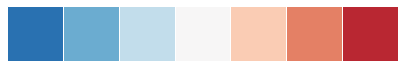

In [182]:
# Color of cells
palette = ListedColormap(sns.color_palette("RdBu_r", 7))
# palette = ListedColormap(sns.color_palette("Blues_d")[::-1])

sns.palplot(sns.color_palette("RdBu_r", 7))

In [178]:
# Prepare colored index for heatmap
colors = '#00FF7F', '#006400', '#00FF00', '#8B0000', '#DC143C', '#800080', '#808000', '#9370DB', '#00CED1'
correspondance = dict(zip(matrix.loc[:, 'Species'].unique(), colors))
row_colors = matrix.loc[:, 'Species'].map(correspondance)

## Plot

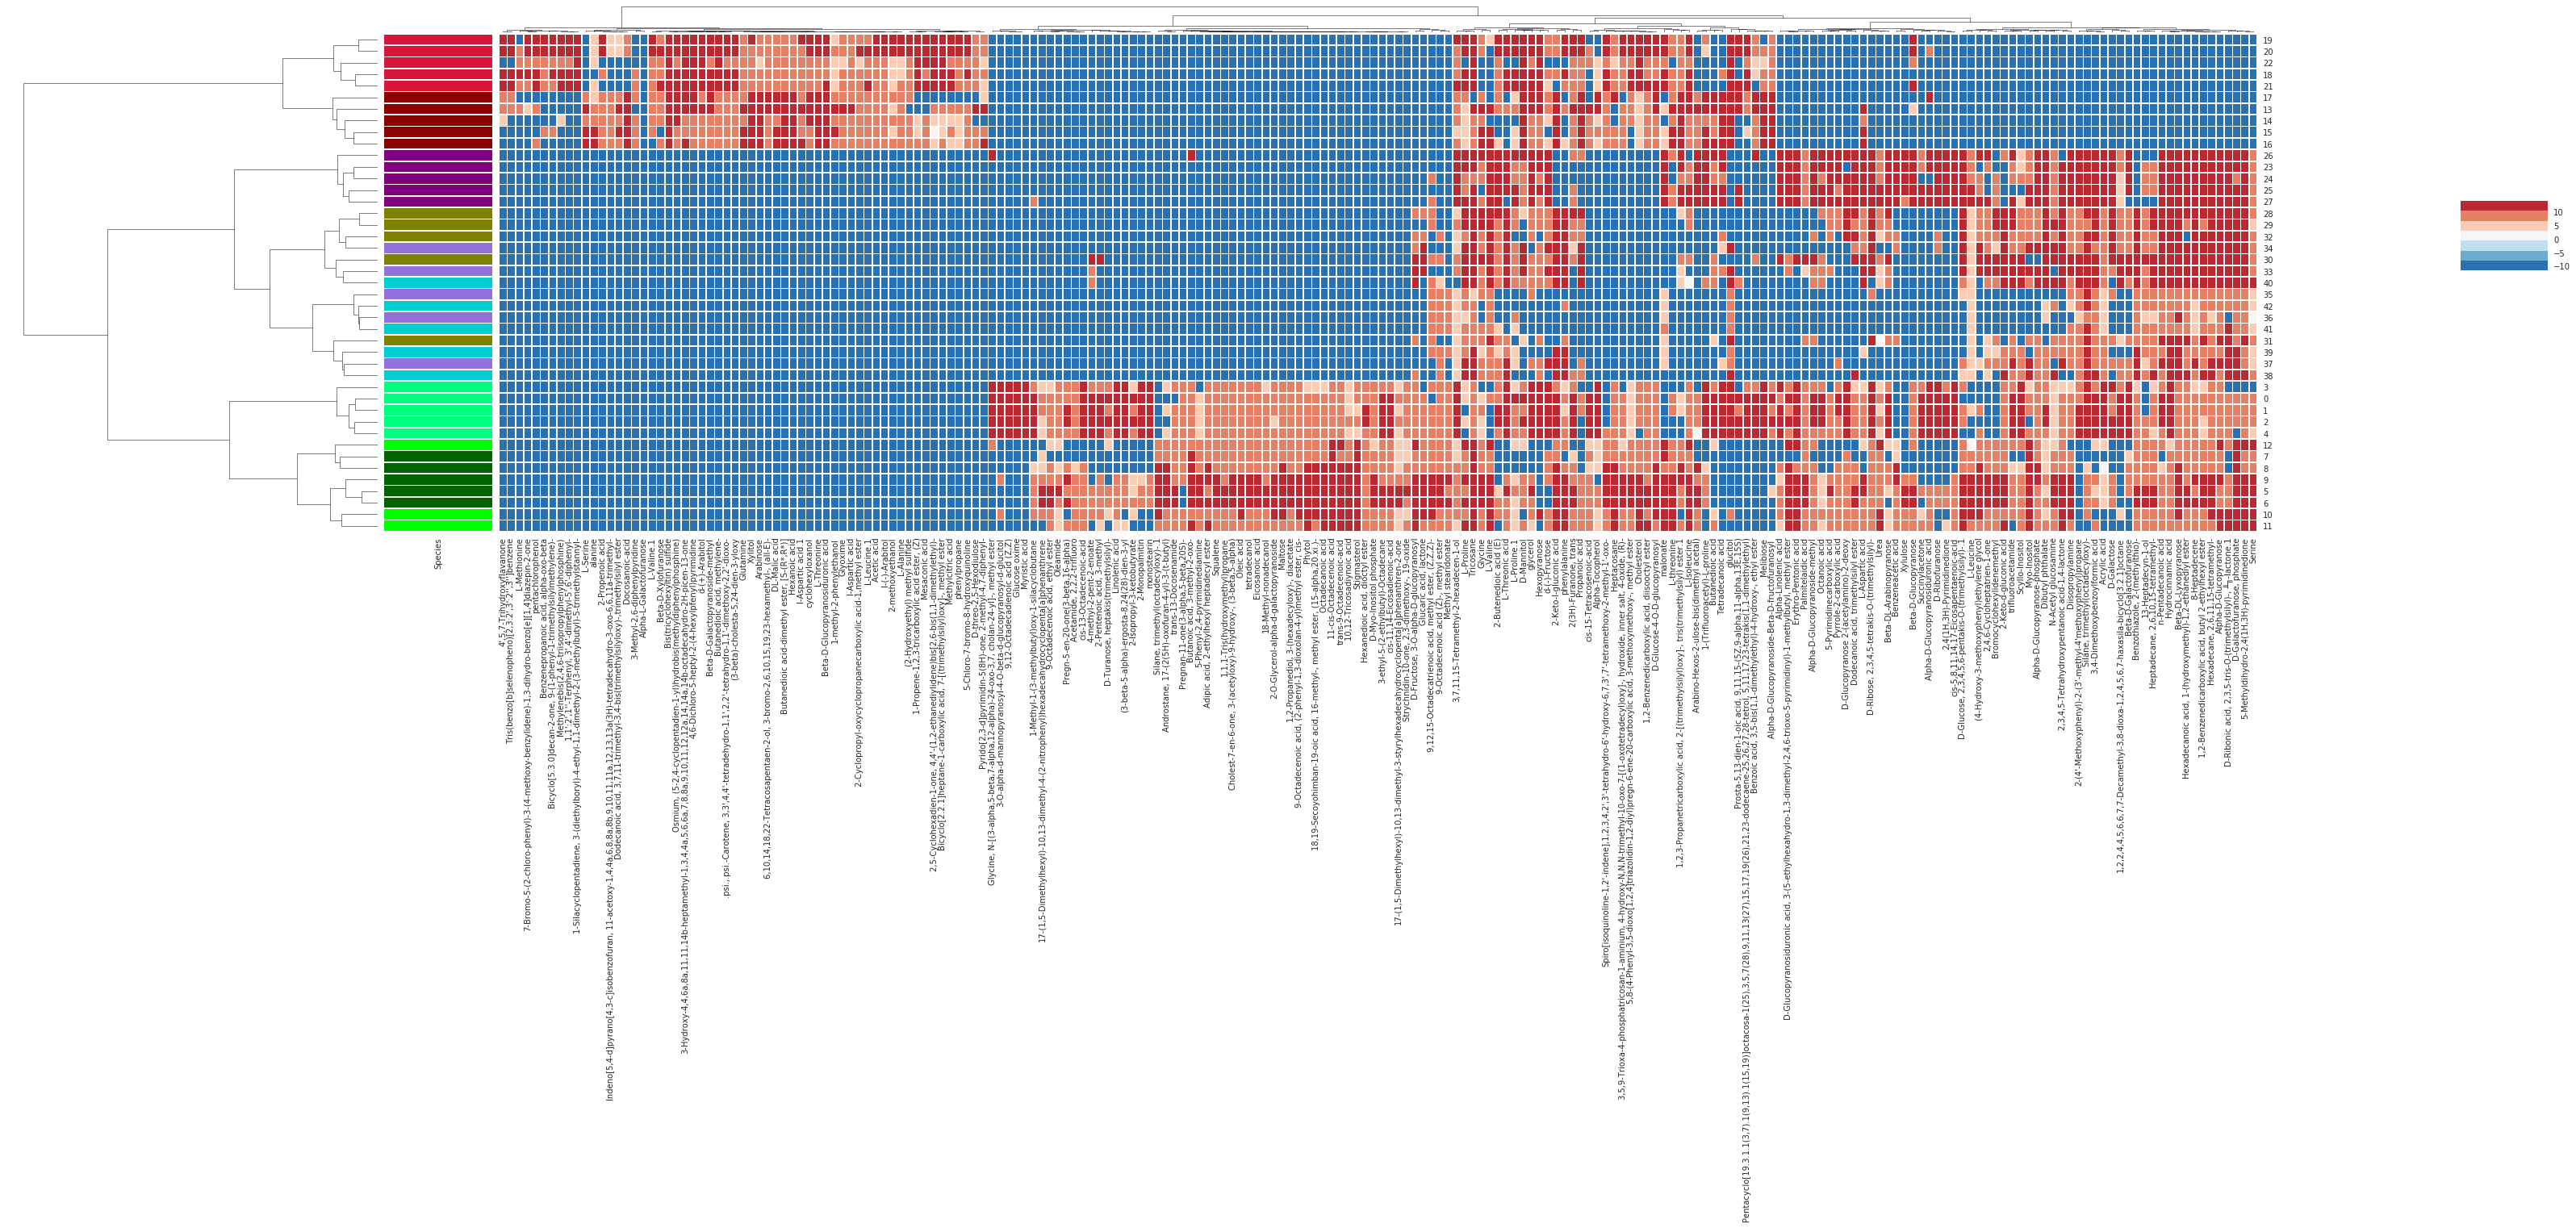

In [179]:
a = sns.clustermap(log_data.drop('Species', axis=1), figsize=(50, 12), 
                   row_colors=row_colors, robust=True, linewidths=0.7, 
                   annot_kws={'name': 'Arial'}, cmap=palette, method='ward') # vmin=0, vmax=1000000
# Rotate row labels
plt.setp(a.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

# Place for legend
a.cax.set_position((0.97, 0.5, 0.03, 0.1))

# Font settings
sns.set(font='sans-serif', font_scale=1)

# Save
a.savefig('hm_log_ward')